In [2]:
url = "https://archive.ics.uci.edu/static/public/492/metro+interstate+traffic+volume.zip"
import requests
responce = requests.get(url)

In [3]:
with open("Metro Interstate Traffic Volume.zip","wb") as f:
    f.write(responce.content)

In [4]:
import zipfile
with zipfile.ZipFile("Metro Interstate Traffic Volume.zip") as zipped:
    zipped.extractall("Metro Interstate Traffic Volume")

In [6]:
import pandas as pd

i_94 = pd.read_csv(r"Metro_Interstate_Traffic_Volume.csv")

In [7]:
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [9]:
bol = i_94["holiday"]

In [13]:
i_94[bol]


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
48199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
new_df = i_94[~i_94["holiday"].str.contains("None")]
new_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
126,Columbus Day,273.080,0.00,0.0,20,Clouds,few clouds,2012-10-08 00:00:00,455
1123,Veterans Day,288.120,0.00,0.0,87,Clear,sky is clear,2012-11-12 00:00:00,1000
1370,Thanksgiving Day,278.540,0.00,0.0,20,Mist,mist,2012-11-22 00:00:00,919
2360,Christmas Day,264.400,0.00,0.0,90,Clouds,overcast clouds,2012-12-25 00:00:00,803
2559,New Years Day,263.490,0.00,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
...,...,...,...,...,...,...,...,...,...
44441,Memorial Day,299.487,0.00,0.0,24,Clouds,few clouds,2018-05-28 00:00:00,1088
45547,Independence Day,297.550,0.00,0.0,1,Mist,mist,2018-07-04 00:00:00,1021
46936,State Fair,289.020,0.00,0.0,1,Clear,sky is clear,2018-08-23 00:00:00,596
47330,Labor Day,292.430,0.25,0.0,1,Rain,light rain,2018-09-03 00:00:00,962


In [16]:
#None-->missing value
#"None"-->string value present

In [17]:
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


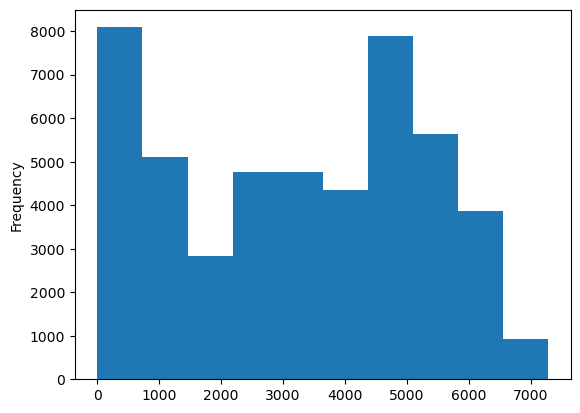

In [20]:
import matplotlib.pyplot as plt
i_94.traffic_volume.plot.hist()
plt.show()

In [21]:
i_94.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

# * Day -7am -7pm (12 hours)
# * Night-7pm -7am (12 hours)


In [22]:
i_94.date_time = pd.to_datetime(i_94.date_time)
i_94.date_time.dtype

dtype('<M8[ns]')

In [24]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [32]:
day_bol = (i_94.date_time.dt.hour >= 7 ) & (i_94.date_time.dt.hour < 19 ) 

In [33]:
day = i_94[day_bol]
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [34]:
day.date_time.min()

Timestamp('2012-10-02 09:00:00')

In [35]:
day.date_time.max()

Timestamp('2018-09-30 18:00:00')

In [36]:
day.date_time.dt.time

0        09:00:00
1        10:00:00
2        11:00:00
3        12:00:00
4        13:00:00
           ...   
48194    15:00:00
48195    15:00:00
48196    16:00:00
48197    17:00:00
48198    18:00:00
Name: date_time, Length: 23877, dtype: object

In [37]:
day.date_time.dt.time.min()

datetime.time(7, 0)

In [38]:
day.date_time.dt.time.max()

datetime.time(18, 0)

In [39]:
night_bol = (i_94.date_time.dt.hour >= 19 ) | (i_94.date_time.dt.hour < 7 ) 
night=i_94[night_bol]

In [40]:
night.date_time.dt.time.max()

datetime.time(23, 0)

In [41]:
night.date_time.dt.time.min()

datetime.time(0, 0)

In [44]:
night.date_time.dt.hour.unique()

array([19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [45]:
day.date_time.dt.hour.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,  8,  7], dtype=int64)

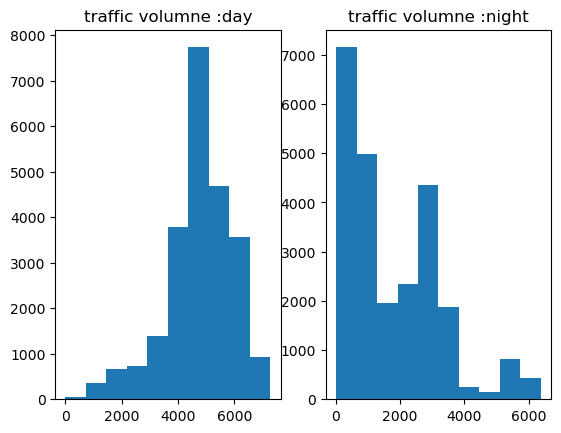

In [46]:
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("traffic volumne :day")

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("traffic volumne :night")

plt.show()

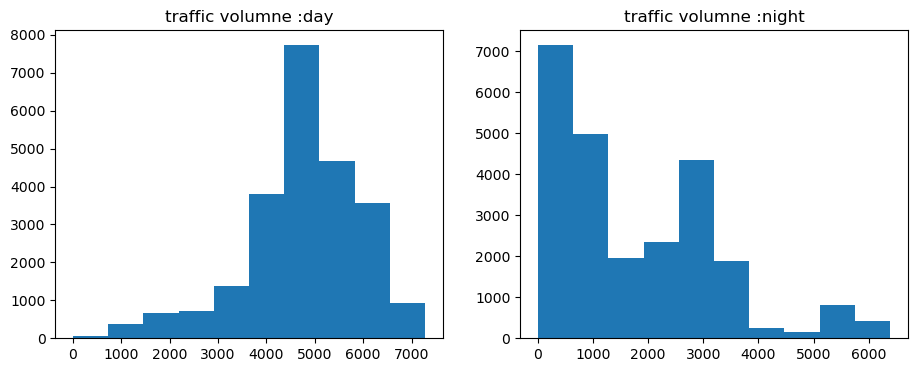

In [47]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("traffic volumne :day")

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("traffic volumne :night")

plt.show()

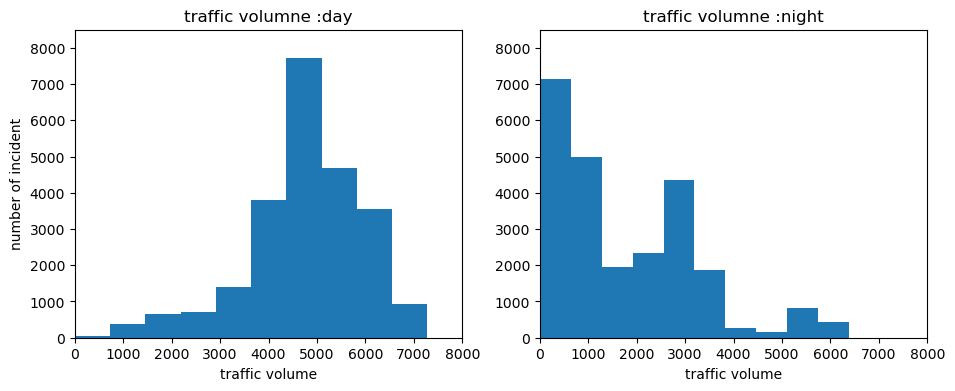

In [73]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("traffic volumne :day")
plt.xlim(0,8000)
plt.ylim(0,8500)
plt.xlabel("traffic volume")
plt.ylabel("number of incident")


plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("traffic volumne :night")
plt.xlim(0,8000)
plt.ylim(0,8500)
plt.xlabel("traffic volume")

plt.show()

In [58]:
day_discription = day.traffic_volume.describe()
day_discription

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [59]:
night_discription = night.traffic_volume.describe()
night_discription

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [66]:
df  = pd.DataFrame(day_discription)

In [67]:
df.columns = ["Day"]

In [68]:
df

,Day
count,23877.000000
mean,4762.047452
std,1174.546482
min,0.000000
25%,4252.000000
50%,4820.000000
75%,5559.000000
max,7280.000000


In [69]:
df["Night"] = night_discription
df

,Day,Night
count,23877.000000,24327.000000
mean,4762.047452,1785.377441
std,1174.546482,1441.951197
min,0.000000,0.000000
25%,4252.000000,530.000000
50%,4820.000000,1287.000000
75%,5559.000000,2819.000000
max,7280.000000,6386.000000


In [70]:
night.traffic_volume.value_counts(bins=10).sort_index()

(-6.3870000000000005, 638.6]    7153
(638.6, 1277.2]                 4983
(1277.2, 1915.8]                1950
(1915.8, 2554.4]                2350
(2554.4, 3193.0]                4359
(3193.0, 3831.6]                1872
(3831.6, 4470.2]                 256
(4470.2, 5108.8]                 150
(5108.8, 5747.4]                 821
(5747.4, 6386.0]                 433
Name: traffic_volume, dtype: int64

# Time indicator 
 * Day
 * day of week
 * Time of day

In [75]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [76]:
day.date_time.dt.month

0        10
1        10
2        10
3        10
4        10
         ..
48194     9
48195     9
48196     9
48197     9
48198     9
Name: date_time, Length: 23877, dtype: int64

In [79]:
day["month"] =day.date_time.dt.strftime("%B")
day

C:\Users\hp\AppData\Local\Temp\ipykernel_21232\27475890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["month"] =day.date_time.dt.strftime("%B")


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,October
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,October
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,October
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,October
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,October
...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,September
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,September
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,September
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,September


In [80]:
group = day.groupby("month")

In [83]:
by_month = group["traffic_volume"].mean()
by_month

month
April        4906.894305
August       4928.302035
December     4374.834566
February     4711.198394
January      4495.613727
July         4595.035744
June         4898.019566
March        4889.409560
May          4911.121609
November     4704.094319
October      4921.234922
September    4870.783145
Name: traffic_volume, dtype: float64

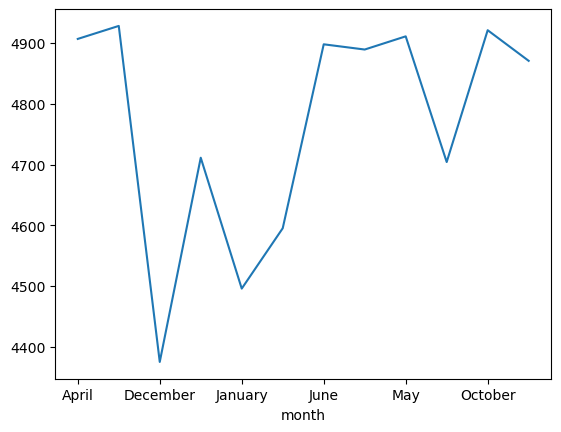

In [90]:
by_month.plot.line()
plt.show()

In [91]:
day["year"] = day.date_time.dt.year

C:\Users\hp\AppData\Local\Temp\ipykernel_21232\3951727864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["year"] = day.date_time.dt.year


In [92]:
only_july = day[day["month"]=="July"]

In [94]:
yearly_group = only_july.groupby("year")["traffic_volume"].mean()
yearly_group

year
2013    4914.354054
2014    4871.598240
2015    4613.146226
2016    3924.923645
2017    4734.120301
2018    4586.899543
Name: traffic_volume, dtype: float64

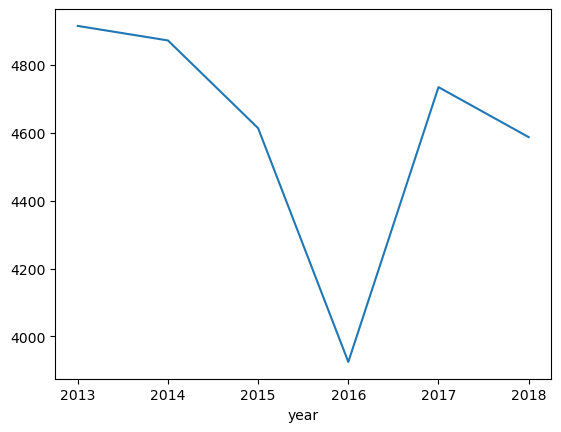

In [95]:
only_july.groupby("year")["traffic_volume"].mean().plot.line()
plt.show()

In [98]:
# Data scientist work
# automation 
# insights
# Expolre ->explain